In [1]:
#Earthquake Data Analysis - Nishant Satpathy 

import pandas as pd #imports the pandas library
from pandas import DataFrame, Series
df = pd.read_csv("Earthquake_Data_2150_BC-2019_NOAA.csv") #reads .csv file containing earthquake data
df1 = df.T #creates a transpose dataframe

In [2]:
"""
1: 50 most powerful earthquakes in terms of magnitude. Parameters of this data collection include
date, place, latitude and longitude.
"""
max_mag = []
eq_dict = {'Year': [], 'Latitude': [], 'Longitude': [], 'Location': [], 'Magnitude': []}
for i in df1: #iterates through dataframe 
    if pd.notnull(df1[i]["EQ_PRIMARY"]) == False: #checks for null values in the column
        continue
    max_mag.append(df1[i]["EQ_PRIMARY"])
mag_list = sorted(max_mag) #sorts list of magnitudes in ascending order
mag_list = mag_list[::-1] #reverses the order
eq_dict['Magnitude'] = mag_list[:50] #slices list for 50 highest magnitudes
ID_list = [] #keeps check of ID of earthquakes to prevent duplication
for i in eq_dict['Magnitude']:
    for l in df1:
        if df1[l]["EQ_PRIMARY"] == i: 
            year = df1[l]["YEAR"]
            if df1[l]["YEAR"] < 0: #checks for years in BC and AD and formats accordingly
                year = str(abs(df1[l]["YEAR"])) + " BC"
            if df1[l]['I_D'] not in ID_list and len(eq_dict['Location']) < len(eq_dict['Magnitude']): 
                eq_dict['Location'] += [df1[l]['LOCATION_NAME']] #adds corresponding elements to the magnitude value 
                eq_dict['Year'] += [df1[l]['YEAR']]
                eq_dict['Latitude'] += [df1[l]['LATITUDE']]
                eq_dict['Longitude'] += [df1[l]['LONGITUDE']]
            ID_list.append(df1[l]['I_D']) #appends ID of earthquake profile
            
df2 = pd.DataFrame.from_dict(eq_dict) #creates dataframe from dictionary
df2 = df2.set_index('Year') 
df2

,Latitude,Longitude,Location,Magnitude
Year,,,,
1960,-38.143,-73.407,"CHILE: PUERTO MONTT, VALDIVIA",9.5
1964,61.017,-147.648,ALASKA,9.2
1730,-32.5,-71.5,CHILE: VALPARAISO,9.1
2004,3.316,95.854,INDONESIA: SUMATRA: ACEH: OFF WEST COAST,9.1
2011,38.297,142.372,JAPAN: HONSHU,9.1
1700,45,-125,CASCADIA SUBDUCTION ZONE,9.0
1952,52.755,160.057,RUSSIA: KAMCHATKA PENINSULA,9.0
1716,-17.2,-71.2,PERU: PUEBLO DE TORATA IN TACNA,8.8
2010,-36.122,-72.898,"CHILE: MAULE, CONCEPCION, TALCAHUANO",8.8


In [3]:
"""
2. 50 most devastating earthquakes in terms of lives lost, people injured and missing. Parameters of this data set 
include magnitude of earthquake, location, lives lost, injured and missing.
"""
eq_dict = {'Year': [], 'Location': [], 'Magnitude': [], 'No. of deaths': [], 'No. of injuries': [], 'No. missing': []}
death_list = [] 
for i in df1: #iterates through the dataframe 
    if pd.notnull(df1[i]["DEATHS"]) == False: #checks for null values
        continue
    else:
        death_list.append(int(df1[i]["DEATHS"])) 
max_death = sorted(death_list) #sorts list in ascending order of deaths
max_death = max_death[::-1] #reverses list
eq_dict['No. of deaths'] = max_death[:50] #slices list for 50 highest values
ID_list = [] #keeps track of duplicate earthquake profiles
for i in eq_dict['No. of deaths']:
    for l in df1:
        if df1[l]["DEATHS"] == i:
            year = df1[l]["YEAR"]
            if df1[l]["YEAR"] < 0: #formats year according to BC and AD
                year = str(abs(df1[l]["YEAR"])) + " BC"
            if df1[l]['I_D'] not in ID_list and len(eq_dict['Location']) < len(eq_dict['No. of deaths']):        
                eq_dict['Location'].append(df1[l]['LOCATION_NAME'])
                eq_dict['Year'].append(year)  
                if pd.notnull(df1[l]["MISSING"]) == False: #checks for null values to assign value or set a hyphen
                    eq_dict['No. missing'].append('-')
                else:
                    eq_dict['No. missing'].append(df1[l]["MISSING"])
                if pd.notnull(df1[l]['INJURIES']) == False:
                    eq_dict['No. of injuries'].append('-') #checks for null values for injuries and no. missing
                else:
                    eq_dict['No. of injuries'].append(df1[l]["INJURIES"]) 
                if pd.notnull(df1[l]["EQ_PRIMARY"]) == False:
                    eq_dict['Magnitude'].append('-')
                else:
                    eq_dict['Magnitude'].append(df1[l]["EQ_PRIMARY"])
            ID_list.append(df1[l]["I_D"])
df2 = pd.DataFrame.from_dict(eq_dict) #creates dataframe from dictionary
df2 = df2.set_index('Year')
df2

,Location,Magnitude,No. of deaths,No. of injuries,No. missing
Year,,,,,
1556,CHINA: SHAANXI PROVINCE,8,830000,-,-
2010,HAITI: PORT-AU-PRINCE,7,316000,30000,-
115,TURKEY: ANTAKYA (ANTIOCH),7.5,260000,-,-
525,"TURKEY: ANTAKYA (ANTIOCH), SAMANDAG",7,250000,-,-
1976,CHINA: NE: TANGSHAN,7.5,242769,799000,-
1139,AZERBAIJAN: GYZNDZHA,-,230000,-,-
856,"IRAN: DAMGHAN, QUMIS",7.9,200000,-,-
1920,"CHINA: GANSU PROVINCE, SHANXI PROVINCE",8.3,200000,-,-
893,ARMENIA: DVIN; IRAN: ARDABIL,-,150000,-,-


In [4]:
"""
3. 50 most destructive earthquakes in terms of damage and destruction to houses. Parameters include location, year
magnitude, houses damaged and houses destroyed
"""
eq_dict = {'Year': [], 'Location': [], 'Magnitude': [], 'Houses Destroyed': [], 'Houses Damaged': []}
house_list = []
for i in df1: #iterates through the dataframe
    if pd.notnull(df1[i]['HOUSES_DESTROYED']) == False: #checks for null values in the column
        continue
    house_list.append(int(df1[i]['HOUSES_DESTROYED']))
damage_list = sorted(house_list) #sorts list in ascending order
damage_list = damage_list[::-1] #reverses order
eq_dict['Houses Destroyed'] = damage_list[:50] #slices list for 50 highest values 
ID_list = [] #checks for duplicate earthquake profiles 
for i in eq_dict['Houses Destroyed']:
    for l in df1:
        if df1[l]['HOUSES_DESTROYED'] == i:
            year = df1[l]["YEAR"] 
            if df1[l]["YEAR"] < 0: #formats year according to BC and AD 
                year = str(abs(df1[l]["YEAR"])) + " BC"
            if df1[l]['I_D'] not in ID_list and len(eq_dict['Location']) < len(eq_dict['Houses Destroyed']):
                eq_dict['Location'].append(df1[l]['LOCATION_NAME'])
                eq_dict['Year'].append(year)
                if pd.notnull(df1[l]['EQ_PRIMARY']) == False: #appends parameters and checks for null values
                    eq_dict['Magnitude'].append('-')
                else:
                    eq_dict['Magnitude'].append(df1[l]['EQ_PRIMARY'])
                if pd.notnull(df1[l]['HOUSES_DAMAGED']) == False:
                    eq_dict['Houses Damaged'].append('-')
                else:
                    eq_dict['Houses Damaged'].append(df1[l]["HOUSES_DAMAGED"])
            ID_list.append(df1[l]["I_D"])
            
df2 = pd.DataFrame.from_dict(eq_dict) #creates dataframe from dictionary
df2 = df2.set_index('Year')
df2

,Location,Magnitude,Houses Destroyed,Houses Damaged
Year,,,,
2008,CHINA: SICHUAN PROVINCE,7.9,5360000,5.36e+06
1996,CHINA: YUNNAN PROVINCE: LIJIANG,6.6,959000,959000
1988,CHINA: YUNNAN PROVINCE,7.3,412000,-
2008,CHINA: SICHUAN PROVINCE,6.0,400000,400000
2008,CHINA: SICHUAN PROVINCE,5.9,392000,392000
2001,"INDIA: GUJARAT: BHUJ, AHMADABAD, RAJOKOT; PA...",7.7,339000,339000
2015,NEPAL: KATHMANDU; INDIA; CHINA; BANGLADESH,7.8,299588,269107
2003,CHINA: YUNNAN PROVINCE,5.9,264878,264878
1830,CHINA: HEBEI PROVINCE,7.5,200000,-


In [5]:
"""
4. Frequencies of earthquakes through the centuries. Parametes include centuries, number of earthquakes in each
century from 1st century AD to the 21st century AD
"""
import matplotlib.pyplot as plot #imports the MATLAB library for plots
eq_dict = {"Centuries": [], "No. of earthquakes": []}
centuries = []
for i in range(0, 2100, 100): #iterates through range to create list of centuries
    centuries.append((i//100)+1)
eq_dict['Centuries'] = centuries
for i in range(len(centuries)): 
    count = 0
    for j in df1:
        if ((df1[j]['YEAR']//100)+1) == centuries[i]: #keeps a count of number of earthquakes happening each century
            count += 1
    eq_dict['No. of earthquakes'].append(count)
df2 = pd.DataFrame.from_dict(eq_dict) #creates dataframe from dictionary
df2 = df2.set_index('Centuries')

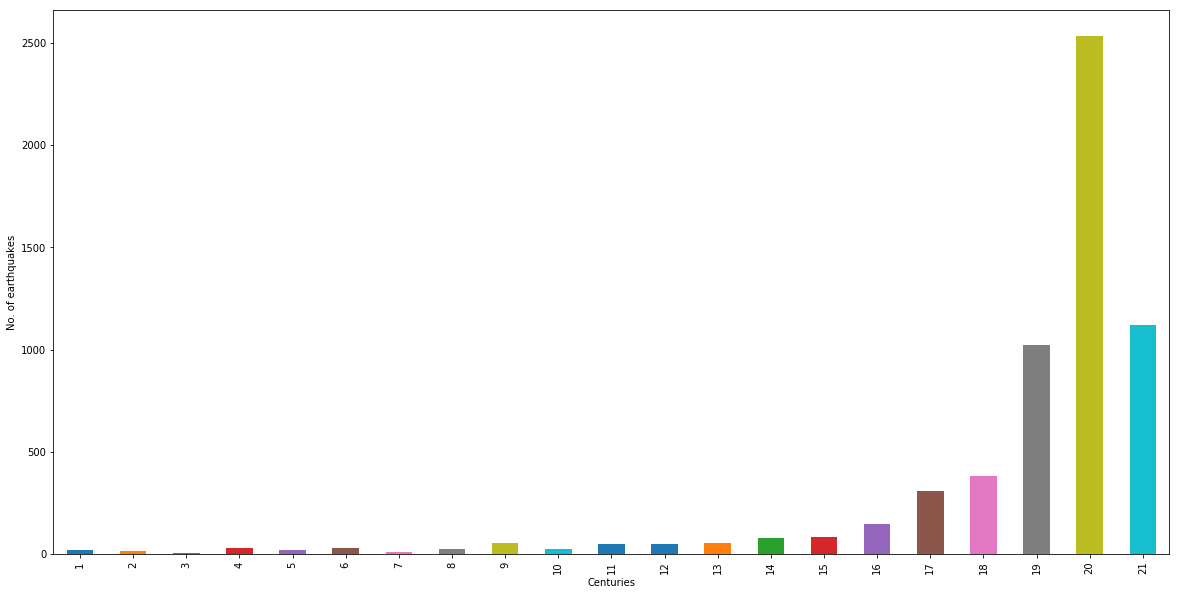

In [6]:
plot.ylabel('No. of earthquakes') #sets y-label
df2['No. of earthquakes'].plot.bar(figsize = (20,10)) #plots bar graph of no. of earthquakes against centuries

In [7]:
"""
5. Number of earthquakes above 7.0 magnitude through the centuries. Parameters include centuries, number of 
earthquakes.
"""
import matplotlib.pyplot as plot
eq_dict = {'Centuries': centuries, 'No. of earthquakes with magnitude above 7.0': []} 
for i in range(len(centuries)): 
    count = 0
    for j in df1:
        if pd.notnull(df1[j]['EQ_PRIMARY']) == False: #checks for null values
            continue
        else:
            if ((df1[j]['YEAR']//100)+1) == centuries[i] and df1[j]['EQ_PRIMARY'] >= 7.0:
                count += 1 #keeps count of earthquakes having magnitude above 7.0
    eq_dict['No. of earthquakes with magnitude above 7.0'].append(count)
df2 = pd.DataFrame.from_dict(eq_dict) #creates dataframe with above values
df2 = df2.set_index('Centuries')

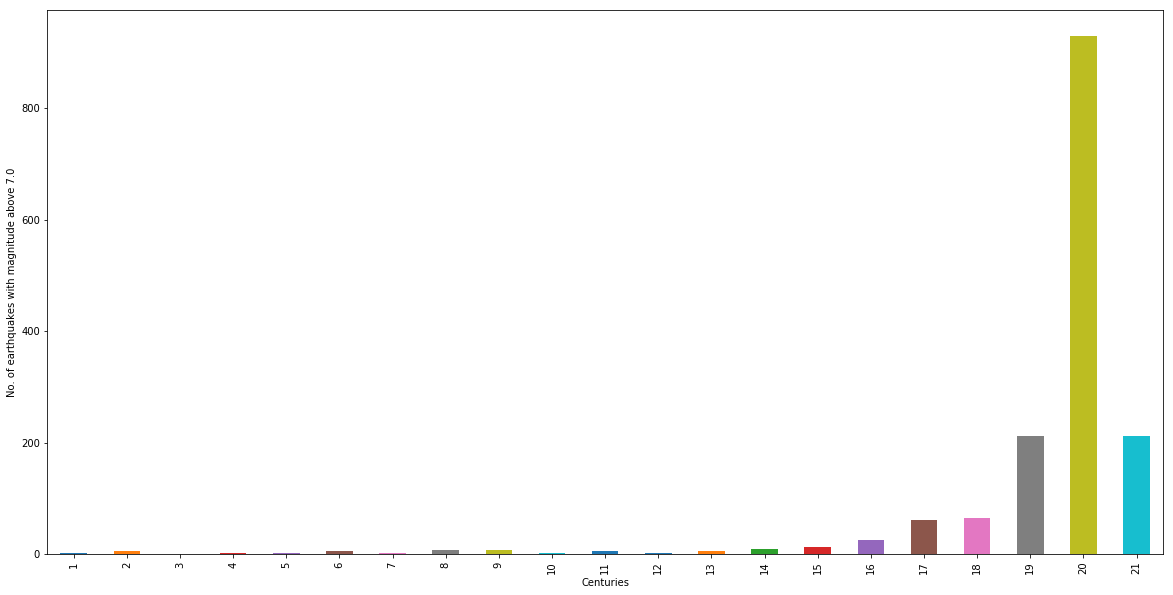

In [8]:
plot.ylabel('No. of earthquakes with magnitude above 7.0') #sets y-label
df2['No. of earthquakes with magnitude above 7.0'].plot.bar(figsize = (20,10)) #plots bar graph of no. of earthquakes against centuries

In [9]:
"""
6. Earthquakes which triggered tsunamis and their corresponding casualties and damages to infrastructure. 
Parameters include year, location, magnitude, tsunami count, total number of deaths and destruction to houses
"""
eq_dict = {'Year': [], 
           'Location': [], 
           'Magnitude': [], 
           'Tsunami': [], 
           'Total No. of Deaths': [], 
           'No. of houses destroyed': []}
max_mag = []
for i in df1: #iterates through dataframe
    if pd.notnull(df1[i]["EQ_PRIMARY"]) == False: #checks for null values
        continue
    max_mag.append(df1[i]["EQ_PRIMARY"])
mag_list = sorted(max_mag) #sorts list in ascending order
mag_list = mag_list[::-1] #reverses order
eq_dict['Magnitude'] = mag_list[:50] #slices list for 50 highest values
ID_list = [] #keeps check of duplicate earthquake profiles
for i in eq_dict['Magnitude']:
    for l in df1:
        if df1[l]["EQ_PRIMARY"] == i:
            year = df1[l]["YEAR"]
            if df1[l]["YEAR"] < 0: #formats year according to BC and AD
                year = str(abs(df1[l]["YEAR"])) + " BC"
            if df1[l]['I_D'] not in ID_list and len(eq_dict['Location']) < len(eq_dict['Magnitude']):
                if pd.notnull(df1[l]['FLAG_TSUNAMI']) == True: #checks if tsunami was triggered by earthquake
                    eq_dict['Tsunami'].append('Y')
                else:
                    eq_dict['Tsunami'].append('N')
                eq_dict['Location'].append(df1[l]['LOCATION_NAME'])
                eq_dict['Year'].append(year)
                if pd.notnull(df1[l]["TOTAL_DEATHS"]) == False: #checks for null values
                    eq_dict['Total No. of Deaths'].append('-')
                else:
                    eq_dict['Total No. of Deaths'].append(int(df1[l]['TOTAL_DEATHS']))
                if pd.notnull(df1[l]["TOTAL_HOUSES_DESTROYED"]) == False:
                    eq_dict['No. of houses destroyed'].append('-')
                else:
                    eq_dict['No. of houses destroyed'].append(int(df1[l]['TOTAL_HOUSES_DESTROYED']))
            ID_list.append(df1[l]['I_D'])
df2 = pd.DataFrame.from_dict(eq_dict) #creates dataframe from dictionary
df2 = df2.set_index('Year')
df2

,Location,Magnitude,Tsunami,Total No. of Deaths,No. of houses destroyed
Year,,,,,
1960,"CHILE: PUERTO MONTT, VALDIVIA",9.5,Y,2226,58622
1964,ALASKA,9.2,Y,139,-
1730,CHILE: VALPARAISO,9.1,Y,5,-
2004,INDONESIA: SUMATRA: ACEH: OFF WEST COAST,9.1,Y,227899,-
2011,JAPAN: HONSHU,9.1,Y,18434,123661
1700,CASCADIA SUBDUCTION ZONE,9.0,Y,-,-
1952,RUSSIA: KAMCHATKA PENINSULA,9.0,Y,10000,-
1716,PERU: PUEBLO DE TORATA IN TACNA,8.8,N,-,-
2010,"CHILE: MAULE, CONCEPCION, TALCAHUANO",8.8,Y,558,-


In [10]:
"""
7. Frequency of earthquakes in different regions of the globe. Parameters include No. of earthquakes, Region Code and
Region name
"""
import matplotlib.pyplot as plot
frequency_dict = {}
region_name = ['Central, Western and S. Africa', 'Northern Africa', 'Antarctica', 'East Asia',
              'Central Asia and Caucasus', 'Kamchatka and Kuril Islands', 'S. and SE. Asia and Indian Ocean',
              'Atlantic Ocean', 'Bering Sea', 'Caribbean', 'Central America', 'Eastern Europe',
              'Northern and Western Europe', 'Southern Europe', 'Middle East', 'North America and Hawaii',
              'South America', 'Central and South Pacific'] #list of region names corresponding to region code
for i in df1:
    if df1[i]['REGION_CODE'] not in frequency_dict:
        frequency_dict[int(df1[i]['REGION_CODE'])] = 1 #keeps count of number of earthquakes per region
    else:
        frequency_dict[int(df1[i]['REGION_CODE'])] += 1
index = 0
eq_list = [] 
for i in sorted(frequency_dict.keys()):
    eq_tup = (i, region_name[index], frequency_dict[i])
    eq_list.append(eq_tup) #creates tuple of region name, region code, and no. of earthquakes
    index += 1 #increments index to keep pace with for loop
eq_list
col = ['Region Code', 'Region', 'No. of earthquakes'] #creates list for column names
df2 = pd.DataFrame.from_records(eq_list, columns = col) #creates dataframe from the list of tuples
df2 = df2.set_index('Region')

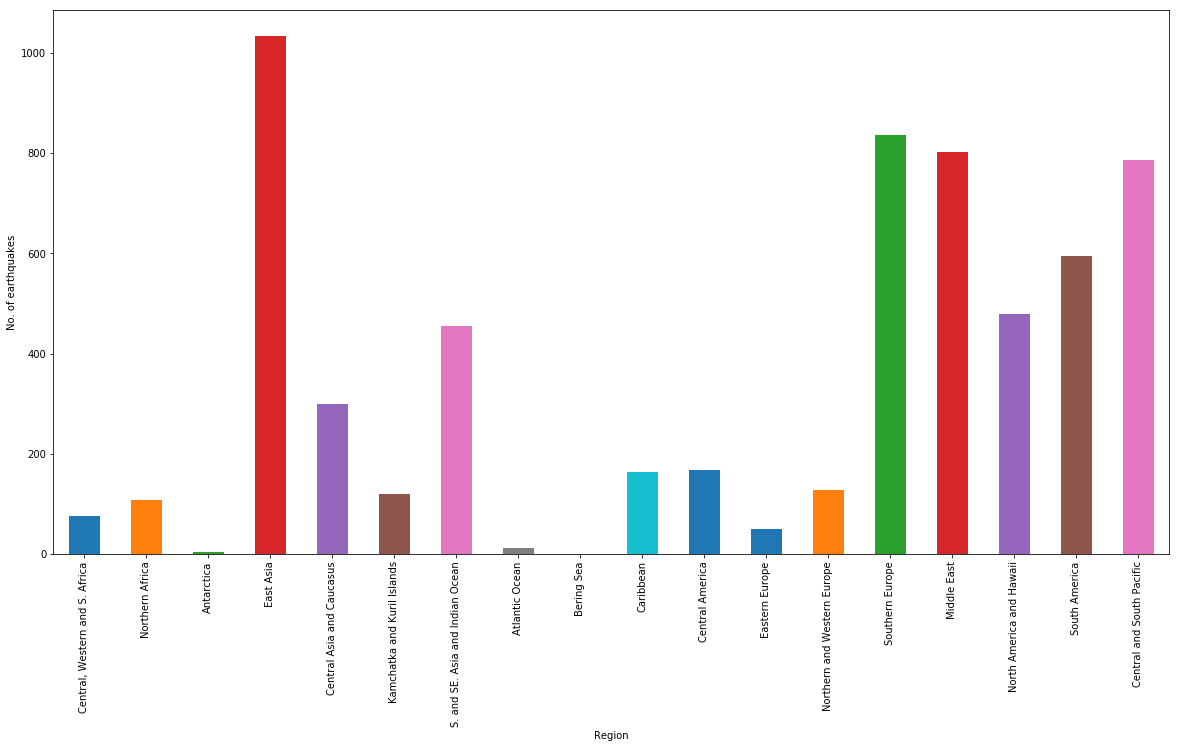

In [11]:
plot.ylabel('No. of earthquakes') #sets y-label
df2['No. of earthquakes'].plot.bar(figsize = (20,10)) #plots no. of earthquakes against region names

In [12]:
"""
50 most financially damaging earthquakes. Parameters include year, location, magnitude and damages in millions of 
dollars
"""
eq_dict = {'Year': [], 'Location': [], 'Magnitude': [], 'Damages in millions of dollars': []}
max_damage = []
for i in df1: #iterates through the dataframe
    if pd.notnull(df1[i]['DAMAGE_MILLIONS_DOLLARS']) == False: #checks for null values
        continue
    else:
        max_damage.append(df1[i]['DAMAGE_MILLIONS_DOLLARS'])
max_damage = sorted(max_damage) #sorts list in ascending order
max_damage = max_damage[::-1] #reverses order
eq_dict['Damages in millions of dollars'] = max_damage[:50] #slices list for 50 highest values
ID_list = [] #checks for duplicate earthquake profiles
for i in eq_dict['Damages in millions of dollars']:
    for l in df1:
        if df1[l]['DAMAGE_MILLIONS_DOLLARS'] == i:
            year = df1[l]["YEAR"]
            if df1[l]["YEAR"] < 0: #formats year according to BC and AD
                year = str(abs(df1[l]["YEAR"])) + " BC"
            if df1[l]['I_D'] not in ID_list and len(eq_dict['Location']) < len(eq_dict['Damages in millions of dollars']):
                eq_dict['Location'].append(df1[l]['LOCATION_NAME'])
                eq_dict['Year'].append(year) #appends parameters to dictionary while checking for null values
                if pd.notnull(df1[l]['EQ_PRIMARY']) == False:
                    eq_dict['Magnitude'].append('-')
                else:
                    eq_dict['Magnitude'].append(df1[l]['EQ_PRIMARY'])
            ID_list.append(df1[l]['I_D'])
df2 = pd.DataFrame.from_dict(eq_dict) #creates dataframe from dictionary
df2 = df2.set_index('Year')
df2 

,Location,Magnitude,Damages in millions of dollars
Year,,,
1995,"JAPAN: SW HONSHU: KOBE, AWAJI-SHIMA, NISHINO...",6.9,100000.000
2008,CHINA: SICHUAN PROVINCE,7.9,86000.000
1994,CALIFORNIA: NORTHRIDGE,6.7,40000.000
2010,"CHILE: MAULE, CONCEPCION, TALCAHUANO",8.8,30000.000
2004,JAPAN: HONSHU: NIIGATA PREFECTURE,6.6,28000.000
1980,"ITALY: AVELLINO, POTENZA, CASERTA, NAPLES",6.9,20000.000
1999,"TURKEY: ISTANBUL, KOCAELI, SAKARYA",7.6,20000.000
2016,"JAPAN: KUMAMOTO, OITA",7.0,20000.000
1988,"ARMENIA: LENINAKAN, SPITAK, KIROVAKAN",6.8,16200.000


In [13]:
"""
Countries being hit with the most number of earthquakes. Parameters include country, No. of earthquakes
"""
import matplotlib.pyplot as plot
country_dict = {} #dictionary of countries with their respective no. of earthquakes
for i in df1: #iterates through the dataframe
    if df1[i]['COUNTRY'] not in country_dict: #keeps count of number of earthquakes in each country
        country_dict[df1[i]['COUNTRY']] = 1
    else:
        country_dict[df1[i]['COUNTRY']] += 1
eq_dict = {'Country': [], 'No. of earthquakes': []} #dictionary of countries and no, of earthquakes in respective lists
frequency = sorted(country_dict.values()) #sorts values in country_dict 
frequency = frequency[::-1] #reverses order
eq_dict['No. of earthquakes'] = frequency[:50] #slices the list for 50 highest values
for i in frequency[:50]: 
    for j in country_dict.keys(): #iterates through keys of country_dict and checks for value in eq_dict
        if country_dict[j] == i and j not in eq_dict['Country'] and len(eq_dict['Country']) < len(eq_dict['No. of earthquakes']):
            eq_dict['Country'].append(j)
df2 = pd.DataFrame.from_dict(eq_dict) #creates dataframe from dictionary
df2 = df2.set_index('Country')

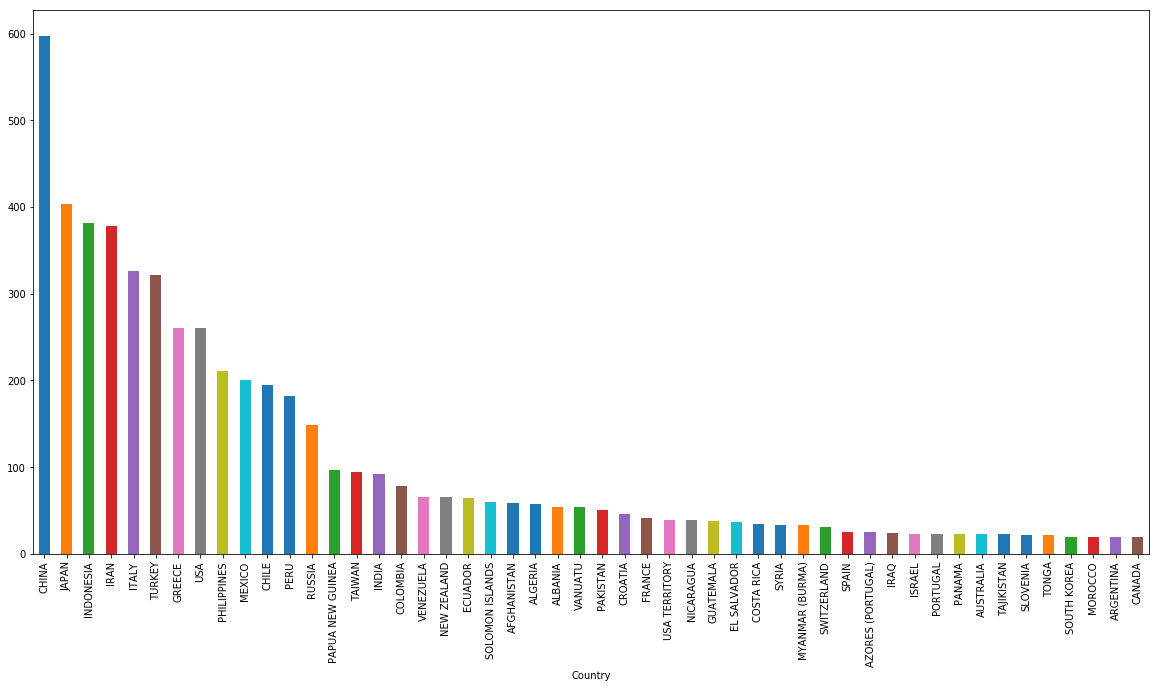

In [14]:
df2['No. of earthquakes'].plot.bar(figsize = (20,10)) #creates bar graph of no. of earthquakes against countries